In [1]:
# install the latest alphapeptdeep
# %pip install peptdeep -U

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
from alphaviz.contrib.ms_viz import MS_Viz

from peptdeep.pretrained_models import ModelManager

model_mgr = ModelManager(mask_modloss=True)

ms_viz = MS_Viz(model_mgr)

2022-09-18 20:10:02> WARNING: Temp mmap arrays are written to /var/folders/hn/0f5pbk7j55sd4r5bxjp25_rm0000gn/T/temp_mmap_ot24k8fv. Cleanup of this folder is OS dependant, and might need to be triggered manually! Current space: 825802022912
2022-09-18 20:10:02> WARNING: No Bruker libraries are available for this operating system. Mobility and m/z values need to be estimated. While this estimation often returns acceptable results with errors < 0.02 Th, huge errors (e.g. offsets of 6 Th) have already been observed for some samples!
2022-09-18 20:10:02> 


2022-09-18 20:10:02> Use method 'warning' via param namespace 


2022-09-18 20:10:02> pandas could not register all extension types imports failed with the following error: cannot import name 'ABCIndexClass' from 'pandas.core.dtypes.generic' (/Users/zengwenfeng/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/generic.py)


In [4]:
# path to the .raw folder or .hdf file
import os
raw_file = os.path.expanduser(
    '~/Workspace/Data/HLA_DIA/20200317_QE_HFX2_LC3_DIA_RA957_DIL5x_R02.raw'
)
hdf = raw_file[:-3]+'tims.hdf'
# path to the DIA-NN output folder
diann_tsv = os.path.expanduser(
    '~/Workspace/Data/HLA_DIA/Umpire_tuned_RA957_A6801_all.tsv'
)

In [5]:
import os
if os.path.isfile(hdf):
    ms_viz.load_ms_data(hdf, dda=False)
else:
    ms_viz.load_ms_data(raw_file, dda=False)
    ms_viz.ms_data.save_as_hdf(
        os.path.dirname(hdf), os.path.basename(hdf)
    )

2022-09-18 20:10:06> Importing data from /Users/zengwenfeng/Workspace/Data/HLA_DIA/20200317_QE_HFX2_LC3_DIA_RA957_DIL5x_R02.tims.hdf
2022-09-18 20:10:06> Using HDF import for /Users/zengwenfeng/Workspace/Data/HLA_DIA/20200317_QE_HFX2_LC3_DIA_RA957_DIL5x_R02.tims.hdf
2022-09-18 20:10:06> Successfully imported data from /Users/zengwenfeng/Workspace/Data/HLA_DIA/20200317_QE_HFX2_LC3_DIA_RA957_DIL5x_R02.tims.hdf


In [6]:
import alphaviz.plotting
chromatograms_viz = alphaviz.plotting.plot_chrom(
    ms_viz.ms_data, colorscale_qualitative='Pastel'
)
chromatograms_viz

In [7]:
ms_viz.load_psms(diann_tsv, 'diann')
ms_viz.psm_df = ms_viz.psm_df[ms_viz.psm_df.raw_name.str.endswith('RA957_DIL5x_R02')]
ms_viz.psm_df

raw_name        sequence  charge  \
0       20200317_QE_HFX2_LC3_DIA_RA957_DIL5x_R02        QRVSGILV       2   
5       20200317_QE_HFX2_LC3_DIA_RA957_DIL5x_R02        HHSTAEEL       2   
13      20200317_QE_HFX2_LC3_DIA_RA957_DIL5x_R02        WHLLHESL       2   
17      20200317_QE_HFX2_LC3_DIA_RA957_DIL5x_R02        TADITVLR       2   
24      20200317_QE_HFX2_LC3_DIA_RA957_DIL5x_R02        LRGKAVVL       2   
...                                          ...             ...     ...   
281861  20200317_QE_HFX2_LC3_DIA_RA957_DIL5x_R02  YAYGFEKPSAIQQR       2   
281867  20200317_QE_HFX2_LC3_DIA_RA957_DIL5x_R02  YDHNFVKAINAIQK       3   
281873  20200317_QE_HFX2_LC3_DIA_RA957_DIL5x_R02  YDHNFVKAINAIQK       2   
281880  20200317_QE_HFX2_LC3_DIA_RA957_DIL5x_R02  TTVNIHVGGGGRLR       3   
281888  20200317_QE_HFX2_LC3_DIA_RA957_DIL5x_R02  YAYGFEKPSAIQQR       3   

             rt  mobility  proteins  uniprot_ids  genes  scan_num     score  \
0       69.2072         0       NaN          NaN    NaN     48556  0.999460   
5       21.3829         0       NaN          NaN    NaN     14986  0.740272   
13      74.6614         0       NaN          NaN    NaN     52388  0.999931   
17      62.9409         0       NaN          NaN    NaN     44157  0.999974   
24      45.3590         0       NaN          NaN    NaN     31814  0.999996   
...         ...       ...       ...          ...    ...       ...       ...   
281861  60.7319         0       NaN          NaN    NaN     42609  0.999987   
281867  67.6786         0       NaN          NaN    NaN     47484  1.000000   
281873  67.6575         0       NaN          NaN    NaN     47471  0.999984   
281880  48.9030         0       NaN          NaN    NaN     34302  0.999996   
281888  60.7217         0       NaN          NaN    NaN     42600  1.000000   

        spec_idx mods mod_sites  nAA   rt_norm  precursor_mz  ccs  
0          48555                   8  0.578095    436.271627  0.0  
5          14985                   8  0.178614    462.214506  0.0  
13         52387                   8  0.623654    517.774534  0.0  
17         44156                   8  0.525752    444.761092  0.0  
24         31813                   8  0.378888    428.292362  0.0  
...          ...  ...       ...  ...       ...           ...  ...  
281861     42608                  14  0.507300    829.420279  0.0  
281867     47483                  14  0.565326    554.298373  0.0  
281873     47470                  14  0.565150    830.943921  0.0  
281880     34301                  14  0.408492    479.607541  0.0  
281888     42599                  14  0.507215    553.282612  0.0  

[45019 rows x 17 columns]

In [8]:
import torch
if torch.cuda.is_available(): # cpu is not too slow in fact
    ms_viz.transfer_learn()

In [9]:
ith_psm = -1
peptide_info = ms_viz.predict_one_peptide_info(
    ms_viz.psm_df.iloc[ith_psm]
)

2022-09-18 20:10:22> Predicting RT ...


100%|██████████| 1/1 [00:00<00:00, 68.26it/s]

2022-09-18 20:10:22> Predicting mobility ...



100%|██████████| 1/1 [00:00<00:00, 108.80it/s]

2022-09-18 20:10:22> Predicting MS2 ...



100%|██████████| 1/1 [00:00<00:00, 63.49it/s]


In [10]:
peptide_info['mz'], peptide_info['rt']/60

(553.2826115766334, 60.72169999999999)

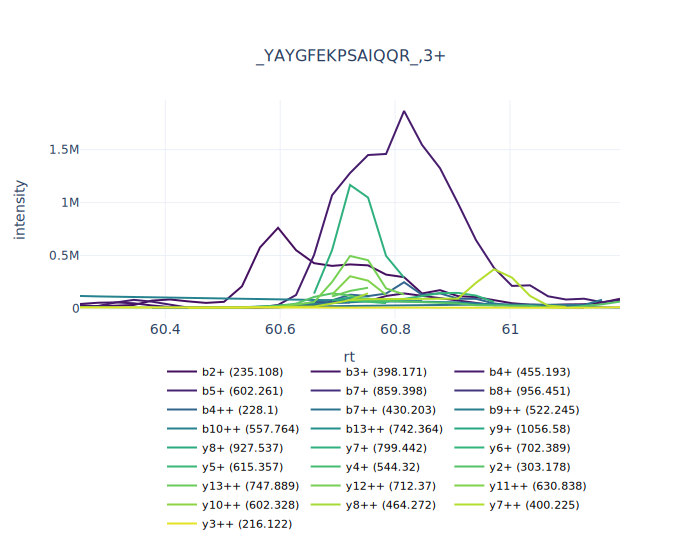

In [11]:
fig = ms_viz.plot_elution_profile(
    peptide_info, mz_tol=20, rt_tol=30,
    include_precursor=False,
)
fig.show('svg') # 'notebook' for interaction

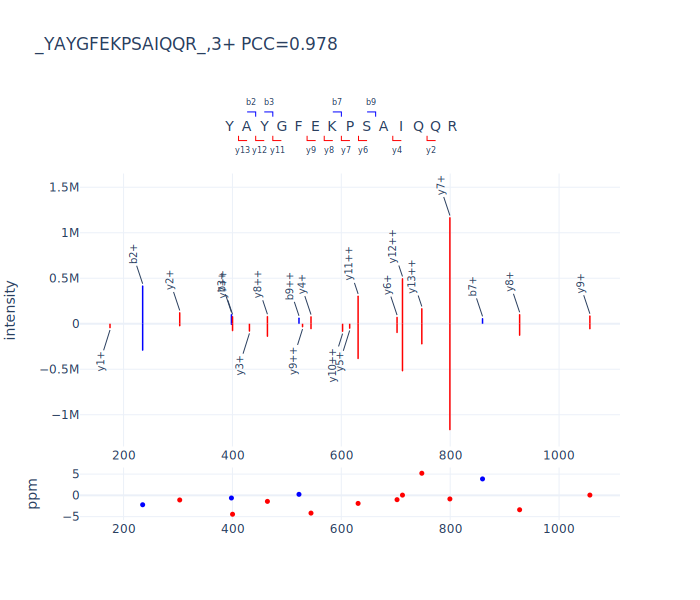

In [12]:
ms_viz.font_size_ladder_ion = 8
fig = ms_viz.plot_mirror_ms2(
    peptide_info,
    mz_tol=10,
    plot_unmatched_peaks=False,
)
fig.show('svg') # 'notebook' for interaction